# 연령판정과 누적관람객수의 관계

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 고은경씨가 올린 movie_info.csv # 2023-04-13 16:00 기준
sample1 = pd.read_csv("C:\\Users\\admin\\gitmiddle\\10M_Movie\\movie_DB\\individual_movie\\movie_info_final.csv")
sample1

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602
...,...,...,...,...,...,...,...,...,...
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672
199,태풍,2005-12-14,"드라마,액션",15세관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150
200,킹콩,2005-12-14,"드라마,어드벤처",15세관람가,미국,필름,피터 잭슨,"잭 블랙,애드리언 브로디,나오미 왓츠",3470059


In [3]:
sample1['Age'].value_counts()

12세이상관람가    84
15세이상관람가    76
전체관람가       17
청소년관람불가     14
15세관람가       6
12세관람가       4
18세관람가       1
Name: Age, dtype: int64

In [7]:
director_age_avg = sample1.groupby(by="Age").mean()
director_age_avg = director_age_avg.astype(int)
director_age_avg.sort_values("Audi", ascending = False)

,Audi
Age,
15세이상관람가,6836247
12세이상관람가,6513111
12세관람가,6191293
전체관람가,5832964
18세관람가,5692997
15세관람가,5458907
청소년관람불가,4981930


### 각 연령판정 별 평균관람객수 컬럼 추가
- Audi_x = 누적관람객수
- Audi_y = 연령판정별 평균관람객수

In [20]:
sample2 = pd.merge(sample1, director_age_avg, on = "Age")
sample2 = sample2.sort_values("Audi_x", ascending = False)
sample2

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,6836247
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,6836247
76,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658,6513111
77,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478,6513111
78,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602,6513111
...,...,...,...,...,...,...,...,...,...,...
186,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,6191293
74,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,6836247
181,태풍,2005-12-14,"드라마,액션",15세관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150,5458907
182,킹콩,2005-12-14,"드라마,어드벤처",15세관람가,미국,필름,피터 잭슨,"잭 블랙,애드리언 브로디,나오미 왓츠",3470059,5458907


In [21]:
sample3 = sample2.reset_index(drop=True)
sample3

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
0,명량,2014-07-30,"사극,액션",15세이상관람가,한국,"필름,2D,4D",김한민,"최민식,류승룡,조진웅",17615919,6836247
1,극한직업,2019-01-23,코미디,15세이상관람가,한국,2D,이병헌,"류승룡,이하늬,진선규,이동휘,공명",16266338,6836247
2,신과함께-죄와 벌,2017-12-20,"판타지,드라마",12세이상관람가,한국,"2D,4D",김용화,"하정우,차태현,주지훈,김향기,마동석",14414658,6513111
3,국제시장,2014-12-17,드라마,12세이상관람가,한국,"필름,2D",윤제균,"황정민,김윤진,오달수,정진영",14264478,6513111
4,어벤져스: 엔드게임,2019-04-24,"액션,SF",12세이상관람가,미국,"2D,3D,4D,IMAX","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",13977602,6513111
...,...,...,...,...,...,...,...,...,...,...
197,해리 포터와 불의 잔,2005-12-01,"액션,판타지",12세관람가,미국,"필름,4D",마이크 뉴웰,"다니엘 래드클리프,루퍼트 그린트,엠마 왓슨,랄프 파인즈",3499257,6191293
198,비긴 어게인,2014-08-13,멜로/로맨스,15세이상관람가,미국,"필름,2D",존 카니,"키이라 나이틀리,마크 러팔로,애덤 리바인,헤일리 스테인펠드,제임스 코든,캐서린 키너",3477672,6836247
199,태풍,2005-12-14,"드라마,액션",15세관람가,한국,"필름,2D",곽경택,"이정재,이미연,장동건",3471150,5458907
200,킹콩,2005-12-14,"드라마,어드벤처",15세관람가,미국,필름,피터 잭슨,"잭 블랙,애드리언 브로디,나오미 왓츠",3470059,5458907


### 순위와 연령판정의 산점도

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

Text(0.5, 1.0, '순위와 연령판정의 산점도')

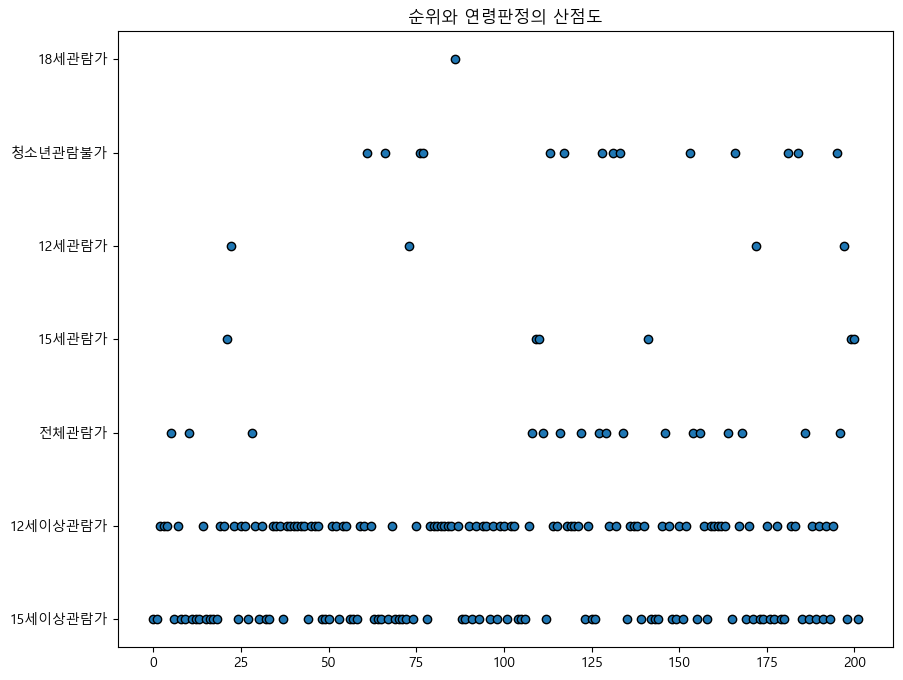

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sample3.index, sample3["Age"], edgecolors='k')
ax.set_title("순위와 연령판정의 산점도")

In [48]:
sample3[sample3["Age"] == "18세관람가"]

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
86,타짜,2006-09-28,드라마,18세관람가,한국,"필름,2D",최동훈,"조승우,김혜수,백윤식,유해진,이수경",5692997,5692997


### 18세관람가의 경우 200위 순위중 단 1개, 그리고 85위 안에 들기위해서는 18세관람가로는 불가능하다

In [50]:
sample3[sample3["Age"] == "청소년관람불가"]

,Title,Release,Genre,Age,Nation,Type,Director,Main_actor,Audi_x,Audi_y
61,내부자들,2015-11-19,"범죄,드라마",청소년관람불가,한국,"필름,2D",우민호,"이병헌,조승우,백윤식",7073581,4981930
66,범죄도시,2017-10-03,"범죄,액션",청소년관람불가,한국,2D,강윤성,"마동석,윤계상,조재윤,최귀화,김성규",6880546,4981930
76,아저씨,2010-08-04,"액션,드라마",청소년관람불가,한국,"필름,2D",이정범,"원빈,김새론",6179525,4981930
77,킹스맨 : 시크릿 에이전트,2015-02-11,"액션,스릴러",청소년관람불가,"미국,영국","필름,2D,4D,IMAX",매튜 본,"콜린 퍼스,태런 에저튼,사무엘 L. 잭슨,마이클 케인",6129681,4981930
113,추격자,2008-02-14,"범죄,스릴러,액션",청소년관람불가,한국,"필름,2D",나홍진,"김윤석,하정우",5046096,4981930
117,킹스맨: 골든 서클,2017-09-27,"액션,어드벤처,코미디",청소년관람불가,"미국,영국","2D,4D,IMAX",매튜 본,"콜린 퍼스,줄리안 무어,태런 에저튼,마크 스트롱,할리 베리,엘튼 존,채닝 테이텀,제...",4945484,4981930
128,범죄와의 전쟁: 나쁜놈들 전성시대,2012-02-02,"범죄,드라마",청소년관람불가,한국,"필름,2D",윤종빈,"최민식,하정우",4720172,4981930
131,신세계,2013-02-21,"범죄,액션",청소년관람불가,한국,"필름,2D",박훈정,"이정재,최민식,황정민",4689828,4981930
133,도가니,2011-09-22,드라마,청소년관람불가,한국,"필름,2D",황동혁,"정유미,공유",4662926,4981930
153,아가씨,2016-06-01,"스릴러,드라마",청소년관람불가,한국,2D,박찬욱,"김민희,김태리,하정우,조진웅",4300365,4981930


### 청소년관람불가의 경우 200위 순위중 단 14개, 그리고 60위 안에 들기위해서는 18세관람가로는 불가능하다

## 연령판정과 누적관람객수의 관계를 알아보자

In [61]:
from scipy import stats

## 가설 검정

- 귀무가설 : 표본 사이에 통계적으로 의미가 없다고 예상되는 가설
- 대립가설 : 표본 사이에 통계적인 차이가 있다는 가설

In [62]:
t, pvalue = stats.ttest_ind(sample3["Audi_x"], sample3["Audi_y"])
print(t, pvalue)

1.989549689200722e-06 0.9999984135559205


### pvalue가 0.999이므로 귀무가설을 기각한다

### 평균관람객수와 누적관람객수는 관계가 크다

### 만약 정규분포가 아니라면???

- 순열 검정 : 모집단의 분포가 정규분포를 따르지 않거나 모집단의 분포를 알 수 없을 때 사용하는 방법
- 모집단의 파라미터를 추정하지 않기 때문에 비모수검정 방법중에 하나

In [64]:
def statistic(x,y):
    return np.mean(x) - np.mean(y)

In [66]:
res = stats.permutation_test((sample3["Audi_x"], sample3["Audi_y"]), statistic, random_state=42)

In [67]:
print(res.statistic, res.pvalue)

0.41584158409386873 0.9866


### pvalue가 0.986이므로 귀무가설을 기각한다.

### 평균관람객수와 누적관람객수는 관계가 크다

In [68]:
# 수리적으로 비교할 수 있는 대조군이 현재 순위, 누적관람객 밖에 없는 관계로 양쪽에서 파생된 수치데이터로는 유의미한 비교가 힘들어보인다

In [69]:
# 상영기간, 날씨 등 더 많은 데이터를 한번에 조회할 수 있도록 데이터가 더 필요해보인다